<a href="https://colab.research.google.com/github/fredrickochieng/Andelabs/blob/master/Copy_of_ECS7020P_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Representing data in Python

Machine learning provides us with tools to extract knowledge from **data**. To build and deploy a machine learning solution, our data science computing environment needs to be able to **represent** our data and has to provide **methods** to manipulate and process that data. Specifically, our data science environment needs to be able to efficiently represent and process **datasets**, i.e. collections of items described by a set of attributes.

In this lab, we will explore different options to represent data and datasets in Python. We will refer to them as **data types**. In addition to the basic built-in types, we will discuss data types defined by two third-party specialised libraries, namely **NumPy** and **Pandas**.

Once you complete this lab, go ahead and attempt the corresponding QM+ quiz.

# Basic data types

Let's start considering two Python **numeric** types, namely ```int``` (for integer numbers) and ```float``` (for real numbers). Numeric types can be used to represent measurements and other quantities, and support operations such as addition (```+```), subtraction (```-```), multiplication (```*```) and division (```/```), among others. Run the following cell to perform some simple calculation on numeric variables.



In [ ]:
a = 2
b = 4
add_a_b = a+b
mult_a_b = a*b
mo_d=b%a
print("a + b =", add_a_b)
print("a * b =", mult_a_b)
print("b mod a=", mo_d)

a + b = 6
a * b = 8
b mod a= 0


The `bool` type (**boolean**) can take on two values (`True` or `False`) and supports three basic operations, namely `and`, `or` and `not`. Comparison operators (`==`, `>`, `<`, etc) return boolean values, as illustrated in the following code cell:



In [ ]:
c = 3.1
d = 4.7
#print("Is c equal to d?", c == d)
print(c==d)
print("Is c less than d?", c < d)
print("Is c equal to and at the same time less than d?", not(c==d)and(c<d))
print(c==d)or(d>c)


False
Is c less than d? True
Is c equal to and at the same time less than d? True
False


True

Finally, text data can be represented as strings (`str` type) in Python. They are defined surrounding the text value by single or double quotation marks:

In [ ]:
e = "This is a string"
print(e)

This is a string


Numeric, boolean and string types are the basic building blocks to create more complex data types.

# Sequence types

The string type is a Python sequence. Sequences are ordered collections and can be used to represent a **complex attribute** (such as text), an **item** described by several attributes or even a **whole dataset**. As we shall see later, there are other options that might be more suitable to represent complex attributes and whole datasets, however it is important to be familiar with sequences.

In addition to strings, Python offers other sequence types. We will cover Python **lists** here. Lists are defined as elements separated by commas between square brackets and can **indexed** and **sliced**:
- Indexing retrieves one element in a list. Given a list `s`, the `i`-th element can be retrived by typing `s[i]`. Note that the index of the first element in a list is 0.
- Slicing returns a subset of elements from the list. Typing `s[i:j:k]` returns a list of elements starting from index `i` to `j` (excluding `j`) with step `k`.

The following code cell illustrates indexing and slicing.

In [ ]:
squares = [1, 2, 4, 9, 16, 25]
print("My list of squares  is: ", squares)
print("The first square is: ", squares[0]) #Example of indexing: 0 is the index of the first element in the list
print("The second square is: ", squares[1]) #Example of indexing: 1 is the index of the second element in the list
print("The first three squares are: ", squares[0:3]) #Example of slicing: we extract the elements with indices 0 to 2 (i.e. 3-1)
print("The last element in my squares :  ", squares[5])
print("My special elements in the squares is : ",squares[1:5:2])

My list of squares  is:  [1, 2, 4, 9, 16, 25]
The first square is:  1
The second square is:  2
The first three squares are:  [1, 2, 4]
The last element in my squares :   25
My special elements in the squares is :  [2, 9]


We can also create lists of lists. This feature can be used to represent a dataset, i.e. a collection (list) of items described by a collection (list) of attributes. Indexing and slicing can be used to extract individual items and single attributes from one item.

In [ ]:
item1 = ['Individual A', 1, 100] #Item described by three attributes
item2 = ['Individual B', 2, 200]
item3 = ['Individual C', 3, 300]
item4 = ['Individual D', 4, 400]
print(item1,item2,item3,item4)

MyDataset = [item1, item2, item3, item4] #Dataset consisting of 4 items
print(MyDataset)


print("My dataset is:\n", MyDataset) #Prints the whole dataset

print("\nThe second and third items in my dataset are:\n", MyDataset[1:3]) #Prints items with indices 1 to 2 (3-1)

print("\nThe second attribute of the third item is: ", MyDataset[2][1]) #Prints the second attribute of the third item

MyDataset[1][1] = 5 #Sets the second attribute of the seconf item to 5

print("\nAfter updating, my dataset is:\n", MyDataset) #Prints the whole dataset


['Individual A', 1, 100] ['Individual B', 2, 200] ['Individual C', 3, 300] ['Individual D', 4, 400]
[['Individual A', 1, 100], ['Individual B', 2, 200], ['Individual C', 3, 300], ['Individual D', 4, 400]]
My dataset is:
 [['Individual A', 1, 100], ['Individual B', 2, 200], ['Individual C', 3, 300], ['Individual D', 4, 400]]

The second and third items in my dataset are:
 [['Individual B', 2, 200], ['Individual C', 3, 300]]

The second attribute of the third item is:  3

After updating, my dataset is:
 [['Individual A', 1, 100], ['Individual B', 5, 200], ['Individual C', 3, 300], ['Individual D', 4, 400]]


Standard Python lists lack many operations and constraints needed to efficiently and safely build machine learning solutions. Therefore in most cases we will use data types defined by NumPy and Pandas.

# NumPy

NumPy is the fundamental Python library for numerical computing. The core of NumPy is the `ndarray`, a **multidimensional array** (grid of values) that comes with a set of efficiently implemented array operations. Each dimension in an `ndarray` is known as axis. A 1D NumPy array has one axis and represents a vector, a 2D NumPy array has two axis and represents a matrix, a 3D NumPy array represents a 3-tensor, etc.

In order to use NumPy, we need to import it first.

In [ ]:
import numpy as np



In contrast to standard Python lists, NumPy arrays have a **fixed size** at creation and their elements need to be of the **same type**. There are several ways to create NumPy arrays. The easiest one is to use the `array` function on a standard Python list. In the following example, we create a 1D NumPy array consisting of integer elements.

In [ ]:
my1Darray = np.array([1, 2, 4, 9, 16, 25])

print("The array 'my1Darray' is", my1Darray)
print(my1Darray[3])
print("The type of 'my1Darray' is", type(my1Darray))
print(type(my1Darray))
print("The array 'my1Darray' consists of elements of type", my1Darray.dtype)
print(my1Darray.dtype)
print("The array 'my1Darray' has", my1Darray.ndim, "dimension")
print(my1Darray.ndim)
print("The shape of 'my1Darray' is", my1Darray.shape)
print(my1Darray.shape)

The array 'my1Darray' is [ 1  2  4  9 16 25]
9
The type of 'my1Darray' is <class 'numpy.ndarray'>
<class 'numpy.ndarray'>
The array 'my1Darray' consists of elements of type int64
int64
The array 'my1Darray' has 1 dimension
1
The shape of 'my1Darray' is (6,)
(6,)


2D NumPy arrays, where values are arranged in rows and columns, can be created from lists of lists. Let's create a 2D NumPy array consisting of float elements arranged in 3 rows and 2 columns (3x2 array):

In [ ]:
my2Darray = np.array([[1.1, 2.1], [3.0, 4.2], [5.2, 6.1]])

print("The array 'my2Darray' is \n", my2Darray)
print("The type of 'my2Darray' is", type(my2Darray))
print("The array 'my2Darray' consists of elements of type", my2Darray.dtype)
print("The array 'my2Darray' has", my2Darray.ndim, "dimensions")
print("The shape of 'my2Darray' is", my2Darray.shape)

The array 'my2Darray' is 
 [[1.1 2.1]
 [3.  4.2]
 [5.2 6.1]]
The type of 'my2Darray' is <class 'numpy.ndarray'>
The array 'my2Darray' consists of elements of type float64
The array 'my2Darray' has 2 dimensions
The shape of 'my2Darray' is (3, 2)


There are many other useful functions that can be used to create NumPy arrays, for instance:

In [ ]:
a = np.linspace(0,1,11) # Array consisting 11 elements uniformly spaced, from 0 to 1
print("'a' is \n", a, "\n and its shape is", a.shape, "\n")
b = np.arange(0,20,2.5) # Array consisting of elements spaced by 2.5, from 0 to 20
print("'b' is \n", b, "\n and its shape is", b.shape, "\n")
c = np.zeros(5) # 1D Array consisting of 5 zeros
print("'c' is \n", c, "\n and its shape is", c.shape, "\n")
M = np.zeros((2,5)) # 2x5 (2 rows, 5 columns) array consisting of zeros
print("'M' is \n", M, "\n and its shape is", M.shape, "\n")
w = np.ones(7) # 1D array consisting of 7 ones
print("'w' is \n", w, "\n and its shape is", w.shape, "\n")
N = np.ones((3,2)) # 3x2 (3 rows, 2 columns) array consisting of ones
print("'N' is \n", N, "\n and its shape is", N.shape, "\n")
I = np.eye(4) # 4x4 array with ones on the diagonal and zeros elsewhere
print("'I' is \n", I, "\n and its shape is", I.shape, "\n")
R = np.random.rand(2,4) # 2x4 array of random values from a uniform distribution
print("'R' is \n", R, "\n and its shape is", R.shape, "\n")


'a' is 
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 
 and its shape is (11,) 

'b' is 
 [ 0.   2.5  5.   7.5 10.  12.5 15.  17.5] 
 and its shape is (8,) 

'c' is 
 [0. 0. 0. 0. 0.] 
 and its shape is (5,) 

'M' is 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 
 and its shape is (2, 5) 

'w' is 
 [1. 1. 1. 1. 1. 1. 1.] 
 and its shape is (7,) 

'N' is 
 [[1. 1.]
 [1. 1.]
 [1. 1.]] 
 and its shape is (3, 2) 

'I' is 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 
 and its shape is (4, 4) 

'R' is 
 [[0.67729112 0.73963224 0.86115559 0.32627914]
 [0.04794536 0.91647817 0.67448858 0.03806185]] 
 and its shape is (2, 4) 



NumPy arrays can be **indexed** and **sliced** just like standard Python lists. Let's create a 2D 4x4 array and explore indexing and slicing:

In [ ]:
M = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
print("The NumPy array M is:\n", M)
print("\nThe second row of M is:\n", M[1])
print("\nThe entry at the first row third column is:\n", M[0,2])
print("\nThis is a subarray of M:\n", M[1:3,1:3])
print("\nThe first two rows of M are:\n", M[0:2,:])

The NumPy array M is:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

The second row of M is:
 [5 6 7 8]

The entry at the first row third column is:
 3

This is a subarray of M:
 [[ 6  7]
 [10 11]]

The first two rows of M are:
 [[1 2 3 4]
 [5 6 7 8]]


Numpy arrays can also be saved to and created from a file. The standard file format for storing NumPy arrays on disk is `.npy`, although other formats such as CSV can be used too.

We will now explore how to use NumPy to represent complex datasets. After uploading the file `myDigitsDataset.npy` to your runtime, run the cell below to load the dataset into a NumPy array and read some basic info about it.

In [ ]:
myDigits = np.load('myDigitsDataset.npy')
print("The type of 'myDigits' is", type(myDigits))
print("The array 'myDigits' consists of elements of type", myDigits.dtype)
print("The array 'myDigits' has", myDigits.ndim, "dimensions")
print("The shape of 'myDigits' is", myDigits.shape)
print(myDigits)

The type of 'myDigits' is <class 'numpy.ndarray'>
The array 'myDigits' consists of elements of type int64
The array 'myDigits' has 3 dimensions
The shape of 'myDigits' is (10, 28, 28)
[[[7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  ...
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]]

 [[7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  ...
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]]

 [[7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  ...
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]]

 ...

 [[7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  ...
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]]

 [[7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  ...
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]]

 [[7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  ...
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]
  [7 7 7 ... 7 7 7]]]


The `myDigits` NumPy array is an example of a 3-tensor. It consists of 10 items described by 28x28 attributes. You can see it as 10 different 28x28 2D arrays stacked together. Let's print the third (index 2) item:

In [ ]:
myThirdDigit = myDigits[2,:,:]
print("The shape of my 3rd item is:", myThirdDigit.shape)
print("\nMy 3rd item is:\n", myThirdDigit)

#quiz2.1,we print the 8th (index 7) item.
myEighthDigit = myDigits[7,:,:]
print("The shape of my 8th item is:", myEighthDigit.shape)
print("\nMy 8th item is:\n", myEighthDigit)

The shape of my 3rd item is: (28, 28)

My 3rd item is:
 [[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 7 7]
 [7 7 7 7 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 7 7]
 [7 7 7 7 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 7 7 7 7 7]
 [7 7 7 7 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 7 7 7]
 [7 7 7 7 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 7 7 7]
 [7 7 7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 7 7 7]
 [7 7 7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 7 7 7 7 7 7]
 [7 7 7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 7 7 7 7 7 7]
 [7 7 7 0 0 0 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 7 7 7 7 7 7 7]
 [7 7 7 0 0 0 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7 7]
 [7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7 7 7]


Do you see anything? Does it look like the number 4? Let's use the visualisation library matplotlib to plot the array:

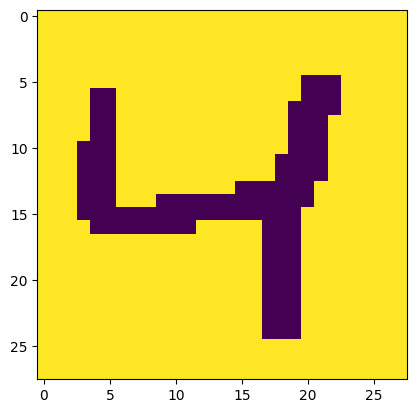

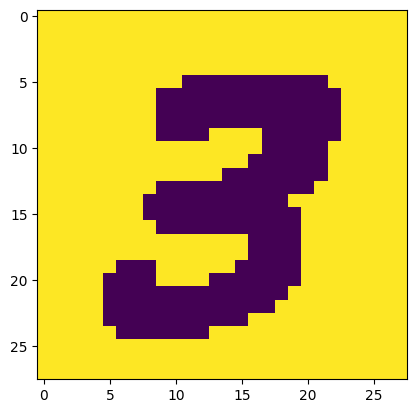

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(myThirdDigit)
plt.show()
plt.imshow(myEighthDigit)
plt.show()

It is indeed a picture representing the digit "4". Our small dataset is based on the well-known [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, which consists of 70,000 gray scale 28x28 images of handwritten digits. Instead of gray scale images, where each entry (pixel) can take any value within a continuous range (for instance 0 and 1), we have pictures where pixels can take up only two values, namely 0 and 7. There is nothing special about these two values, what is relevant is that the pattern displayed depends on which pixels take which value.

Pictures are an example of grid data, i.e. complex data consisting of multiple values associated to a grid. Audio clips are also examples of grid data, where the grid is 1D (the time axis).

# Pandas

Although briefly, we have already seen Pandas. Pandas is a specialised library that provides data structures to represent sequences (known as **Series**) and tables (known as **DataFrames**). You can think of a Pandas DataFrame as a 2D table where each column is a 1D Pandas Series. In fact, when you extract one single column from a DataFrame, the data type that you obtain is a Series.

In contrast to NumPy arrays, which are homogeneous (i.e. all the elements in the array must be of the same type), Pandas tabular structures support heterogenous columns (i.e. only the elements within a column are required to be of the same type).

Before using pandas we need to import it.

In [ ]:
import pandas as pd

There are several ways to create Pandas Series and DataFrames, for instance by passing a standard Python list or a NumPy array, as shown in the following examples:

In [ ]:
s = pd.Series([1, 2, 4, 9, 16, 25])
df = pd.DataFrame(np.random.randn(10, 10))

print("The Series s is:\n", s)

print("\nThe DataFrame df is:\n",df)

print("\nThe first two rows of the DataFrame df are:\n", df.head(2))

print("\nThe last two rows of the DataFrame df are:\n",df.tail(2))



The Series s is:
 0     1
1     2
2     4
3     9
4    16
5    25
dtype: int64

The DataFrame df is:
           0         1         2         3         4         5         6  \
0 -0.191012 -0.726866  0.116397  1.535542 -1.233279  2.473482  1.178133   
1 -0.345977  0.452898 -0.612581 -0.080846  1.108219 -1.723948  0.105045   
2  0.530981  0.726736 -1.081668  1.145158 -0.071555 -0.306622 -0.499137   
3 -1.147511 -0.020694  1.294569  0.073769  0.116128 -2.295432  0.572374   
4  0.230920  0.938540  0.866300 -0.373822  0.199259 -0.493353 -1.473275   
5 -0.641340  2.217420  0.178076 -0.636509 -1.086756 -0.870475  0.337932   
6  0.330462 -0.102649  1.160188 -0.328256 -0.162489  0.858886  0.978329   
7 -1.167998  0.241687  0.794494 -0.322152 -0.144701 -1.338844 -1.536557   
8  0.195323  0.615308  1.728209  0.315755 -1.550594 -0.671691  1.545491   
9  2.821674 -0.655946 -0.314825  0.061703 -1.130581 -1.380012  0.099117   

          7         8         9  
0  0.560493  0.394307  1.306647  
1 -0

The indices are also shown when we plot a Pandas Series or DataFrame. They are the integer values on the left-most column and also at the top of the DataFrame. Optionally, we can use our own labels to identify rows (`index` argument) and columns (`columns` argument):

In [ ]:
df = pd.DataFrame(np.random.randint(1,100,[4, 4]), index=["r1", "r2", "r3", "r4"], columns=["c1", "c2", "c3", "c4"])
print("The DataFrame df is:\n", df)

print("\nThe row labels are:", df.index)
print("\nThe columns labels are:",df.columns)


The DataFrame df is:
     c1  c2  c3  c4
r1   9   7  87  98
r2  59  67  16  26
r3  52  24  44   3
r4  11  42  75  51

The row labels are: Index(['r1', 'r2', 'r3', 'r4'], dtype='object')

The columns labels are: Index(['c1', 'c2', 'c3', 'c4'], dtype='object')


Individual columns in a DataFrame can be extracted using the column labels:

In [ ]:
df_c1 = df["c1"]
print("The column c1 of the DataFrame df is \n", df_c1)

df_c2c4 = df[["c2","c4"]]
print("\nThe columns c2 and c4 of the DataFrame df are \n", df_c2c4)

The column c1 of the DataFrame df is 
 r1     9
r2    59
r3    52
r4    11
Name: c1, dtype: int64

The columns c2 and c4 of the DataFrame df are 
     c2  c4
r1   7  98
r2  67  26
r3  24   3
r4  42  51


Rows can be extracted with `loc` and `iloc`. `loc` uses the row label, whereas `iloc` uses the row integer index:


In [ ]:
df_r1r2 = df.loc[["r1","r3"]]
print("The rows r1 and r3 of the DataFrame df are \n", df_r1r2)

df_02 = df.iloc[[0,2]]
print("\nThe first and third rows of the DataFrame df are \n", df_02)


The rows r1 and r3 of the DataFrame df are 
     c1  c2  c3  c4
r1   9   7  87  98
r3  52  24  44   3

The first and third rows of the DataFrame df are 
     c1  c2  c3  c4
r1   9   7  87  98
r3  52  24  44   3


Same result!

Finally, `iat` allows us to operate on individual entries:

In [ ]:
print("The entry with indices (2,3) is:", df.iat[2,3])

df.iat[2,3]=1000 #We now update the entry in the third rwo, fourth column
print("\nThe updated DataFrame df is:\n", df)
print("\nThe entry with indices (2,3) is now:", df.iat[2,3])


The entry with indices (2,3) is: 3

The updated DataFrame df is:
     c1  c2  c3    c4
r1   9   7  87    98
r2  59  67  16    26
r3  52  24  44  1000
r4  11  42  75    51

The entry with indices (2,3) is now: 1000


# Summary

In this lab, we have explored several options to represent data and datasets in Python, including:
- Basic numeric, boolean and string types
- Standard lists
- Numpy arrays
- Pandas Series and DataFrames

In general, NumPy arrays will be our preferred choice to represent complex data on a grid (such as time series and pictures) and homogeneous datasets, where all the attributes are of the same type. Pandas dataframes will be useful to represent heterogeneous datasets, where different attributes can have different types. There are additional subtleties, which you will learn as you develop your machine learning skills.

Go ahead and attempt the QM+ quiz. You will need to use the npy file `myDigitsDataset.npy` and the CSV file `LondonCars2014.csv`. The code cell below shows how to load the above CSV file into a dataframe and displays some basic information about it (remember that you need to upload the CSV file first!).


In [ ]:
df_cars = pd.read_csv('./LondonCars2014.csv')
df_cars.info()
print(df_cars)
#quiz 2.Locate price in index 4321
# Access the price of the car with index 4321
price_of_car_at_index_4321 = df_cars.loc[4321, 'Price']
print("The price of this car will be \n: ", price_of_car_at_index_4321)
record_at_index_4321 = df_cars.iloc[4321]
print(record_at_index_4321)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9080 non-null   object
 1   Model         9080 non-null   object
 2   Year          9080 non-null   int64 
 3   Mileage       9080 non-null   int64 
 4   Price         9080 non-null   int64 
 5   Body Style    9080 non-null   object
 6   Ex Color      9080 non-null   object
 7   In Color      9080 non-null   object
 8   Engine        9080 non-null   object
 9   Transmission  9080 non-null   object
 10  Doors         9080 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 780.4+ KB
               Make                           Model  Year  Mileage  Price  \
0            Toyota                      Avalon XLE  2014     4725  28995   
1              Ford                       Escape SE  2014    17201  24994   
2           Hyundai                  Santa Fe Sport  2014     62